In [44]:
# Import Necessary Libraries
import pandas as pd
import numpy as ny
import statistics
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Load in Marquette Dataset-- G.L for Game Log
gl = pd.read_csv('marquette.csv')
gl.head()
# clean dataset: don't need unnamed 2 column or unnamed 23 column (mostly or all NaN)
print(gl.columns)
gl = gl.drop("Unnamed: 2", axis='columns')
gl = gl.drop("Unnamed: 23", axis='columns')
gl.head()
# change column names
gl.rename(columns={'Unnamed: 0':'GameID','Unnamed: 1':'Date','Unnamed: 3':'Opp','Unnamed: 4':'W/L','Unnamed: 5':'Points Scored','Unnamed: 6':'Opp Points'},inplace=True)
gl.rename(columns={'School':'MU_FGM','School.1':'MU_FGA','School.2':'MU_FG_PCT','School.3':'MU_3PM','School.4':'MU_3PA','School.5':'MU_3PCT','School.6':'MU_FTM','School.7':'MU_FTA','School.8':'MU_FT_PCT',
                   'School.9':'MU_OFF_RB','School.10':'MU_TRB','School.11':'MU_AST','School.12':'MU_STL','School.13':'MU_BLK','School.14':'MU_TOV','School.15':'MU_PF'},inplace=True)
gl.rename(columns={'Opponent':'Opp_FGM','Opponent.1':'Opp_FGA','Opponent.2':'Opp_FG_PCT','Opponent.3':'Opp_3PM','Opponent.4':'Opp_3PA','Opponent.5':'Opp_3PCT','Opponent.6':'Opp_FTM','Opponent.7':'Opp_FTA','Opponent.8':'Opp_FT_PCT',
                   'Opponent.9':'Opp_OFF_RB','Opponent.10':'Opp_TRB','Opponent.11':'Opp_AST','Opponent.12':'Opp_STL','Opponent.13':'Opp_BLK','Opponent.14':'Opp_TOV','Opponent.15':'Opp_PF'},inplace=True)
print(gl.columns)
# delete top row
gl = gl.iloc[1:]
gl.head()



Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'School', 'School.1', 'School.2',
       'School.3', 'School.4', 'School.5', 'School.6', 'School.7', 'School.8',
       'School.9', 'School.10', 'School.11', 'School.12', 'School.13',
       'School.14', 'School.15', 'Unnamed: 23', 'Opponent', 'Opponent.1',
       'Opponent.2', 'Opponent.3', 'Opponent.4', 'Opponent.5', 'Opponent.6',
       'Opponent.7', 'Opponent.8', 'Opponent.9', 'Opponent.10', 'Opponent.11',
       'Opponent.12', 'Opponent.13', 'Opponent.14', 'Opponent.15'],
      dtype='object')
Index(['GameID', 'Date', 'Opp', 'W/L', 'Points Scored', 'Opp Points', 'MU_FGM',
       'MU_FGA', 'MU_FG_PCT', 'MU_3PM', 'MU_3PA', 'MU_3PCT', 'MU_FTM',
       'MU_FTA', 'MU_FT_PCT', 'MU_OFF_RB', 'MU_TRB', 'MU_AST', 'MU_STL',
       'MU_BLK', 'MU_TOV', 'MU_PF', 'Opp_FGM', 'Opp_FGA', 'Opp_FG_PCT',
       'Opp_3PM', 'Opp_3PA', 'Opp_3PCT', 'Opp_FTM', 'Opp_FTA', 'Opp_FT_PCT',
       'Opp

,GameID,Date,Opp,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,1,2023-11-06,Northern Illinois,W,92,70,35,67,.522,9,...,11,16,.688,16,38,10,6,4,14,13
2,2,2023-11-10,Rider,W,95,65,34,62,.548,13,...,8,15,.533,13,36,14,6,1,16,17
3,3,2023-11-14,Illinois,W,71,64,27,62,.435,5,...,11,13,.846,11,37,8,6,7,15,15
4,4,2023-11-20,UCLA,W,71,69,25,55,.455,11,...,18,20,.900,4,27,10,5,3,12,19
5,5,2023-11-21,Kansas,W,73,59,29,64,.453,6,...,9,16,.563,7,29,17,7,2,18,12


In [21]:
# check for any remaining null values-- all good
gl.info()
gl.describe()
gl.get('W/L').unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GameID         37 non-null     object
 1   Date           37 non-null     object
 2   Opp            37 non-null     object
 3   W/L            37 non-null     object
 4   Points Scored  37 non-null     object
 5   Opp Points     37 non-null     object
 6   MU_FGM         37 non-null     object
 7   MU_FGA         37 non-null     object
 8   MU_FG_PCT      37 non-null     object
 9   MU_3PM         37 non-null     object
 10  MU_3PA         37 non-null     object
 11  MU_3PCT        37 non-null     object
 12  MU_FTM         37 non-null     object
 13  MU_FTA         37 non-null     object
 14  MU_FT_PCT      37 non-null     object
 15  MU_OFF_RB      37 non-null     object
 16  MU_TRB         37 non-null     object
 17  MU_AST         37 non-null     object
 18  MU_STL         37 non-null     o

array(['W', 'L', 'W (1 OT)'], dtype=object)

In [52]:
# change all columns except date, opp, and w/l to numerics
numerics = gl.columns.drop({'Date','Opp','W/L'})
gl[numerics] = gl[numerics].apply(pd.to_numeric)
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GameID         37 non-null     int64  
 1   Date           37 non-null     object 
 2   Opp            37 non-null     object 
 3   W/L            37 non-null     object 
 4   Points Scored  37 non-null     int64  
 5   Opp Points     37 non-null     int64  
 6   MU_FGM         37 non-null     int64  
 7   MU_FGA         37 non-null     int64  
 8   MU_FG_PCT      37 non-null     float64
 9   MU_3PM         37 non-null     int64  
 10  MU_3PA         37 non-null     int64  
 11  MU_3PCT        37 non-null     float64
 12  MU_FTM         37 non-null     int64  
 13  MU_FTA         37 non-null     int64  
 14  MU_FT_PCT      37 non-null     float64
 15  MU_OFF_RB      37 non-null     int64  
 16  MU_TRB         37 non-null     int64  
 17  MU_AST         37 non-null     int64  
 18  MU_STL      

In [53]:
# replace W and L with 0 and 1
gl['W/L'] = gl.get('W/L').replace('L',1)
gl['W/L'] = gl.get('W/L').replace('W',0)
gl['W/L'] = gl.get('W/L').replace('W (1 OT)',0)
gl.get('W/L').unique()


/var/folders/f1/zmrfz5j54rd04d5dxc07w4_h0000gn/T/ipykernel_66944/4073218231.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gl['W/L'] = gl.get('W/L').replace('W (1 OT)',0)


array([0, 1])

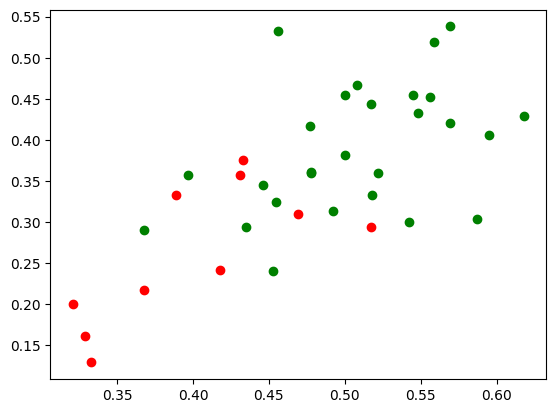

In [54]:
# I want to examine visual representations of the data, marquette and opponents stats on different graphs
# color code by marquette win or loss
mu_wins = gl.where(gl['W/L']==0)
mu_loss = gl.where(gl['W/L']==1)

plt.scatter(x=mu_wins.get('MU_FG_PCT'),y=mu_wins.get("MU_3PCT"),color='g')
plt.scatter(x=mu_loss.get('MU_FG_PCT'),y=mu_loss.get("MU_3PCT"),color='r')

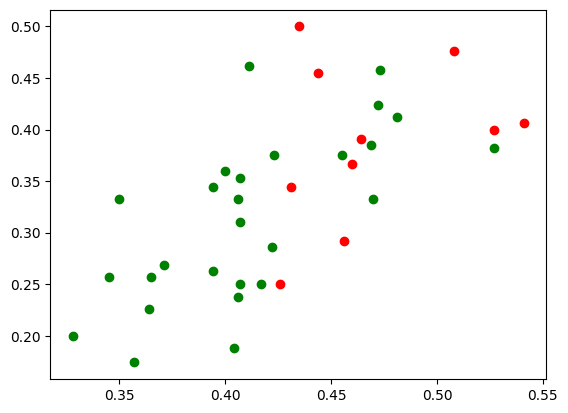

In [55]:
plt.scatter(x=mu_wins.get('Opp_FG_PCT'),y=mu_wins.get("Opp_3PCT"),color='g')
plt.scatter(x=mu_loss.get('Opp_FG_PCT'),y=mu_loss.get("Opp_3PCT"),color='r')